## Data Kuota Subsidi BBM

In [8]:
import pandas as pd

df = pd.read_excel('Dataset Pertamini.xlsx')  # Pastikan Anda mengganti dengan path file yang benar
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]  # Pilih kolom yang relevan
df_selected

,PREMIUM,BIOSOLAR
Provinsi,,
Aceh,181973,36798
Sumatera Utara,431005,1808209
Sumatera Barat,330848,414606
Riau,698926,77686
Jambi,211627,323671
Sumatera Selatan,239477,550981
Bengkulu,60149,129058
Lampung,347218,607444
Kepulauan Bangka Belitung,173105,186764


## Exploratory Data Analysis (EDA)

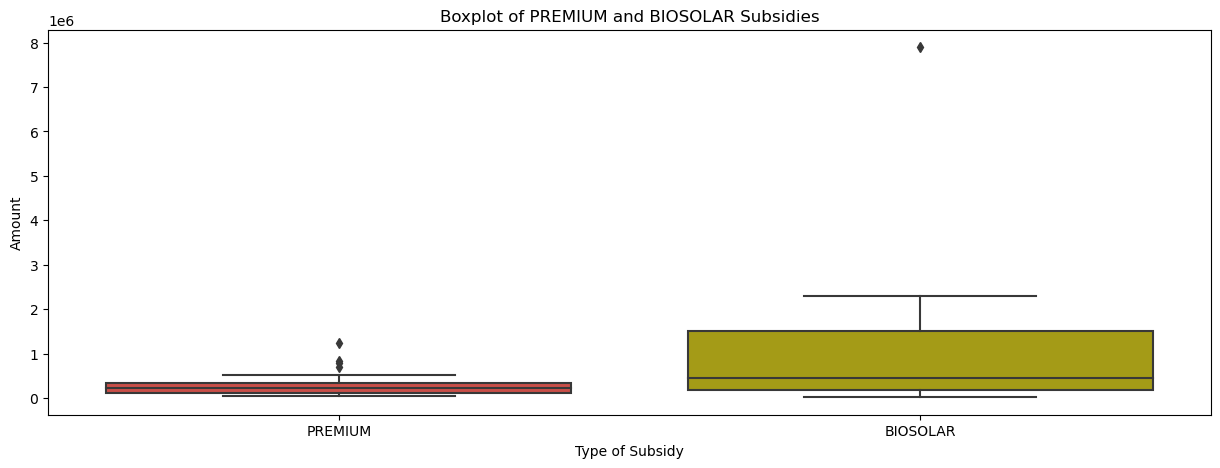

,PREMIUM,BIOSOLAR
count,3.400000e+01,3.400000e+01
mean,2.941176e+05,9.808594e+05
std,2.584587e+05,1.423907e+06
min,4.313600e+04,1.914100e+04
25%,1.244750e+05,1.841848e+05
50%,2.330445e+05,4.570345e+05
75%,3.431255e+05,1.507342e+06
max,1.228895e+06,7.896164e+06


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_selected = df_selected[['PREMIUM', 'BIOSOLAR']]

# Membuat boxplot dengan seaborn
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_selected, palette=['#de3a32', '#bbaf00'])
plt.title('Boxplot of PREMIUM and BIOSOLAR Subsidies')
plt.xlabel('Type of Subsidy')
plt.ylabel('Amount')
plt.show()

# Menampilkan summary statistics
summary_stats = df_selected.describe()
summary_stats


## HAC

Cophenetic Correlation for ward linkage: 0.8201
Cophenetic Correlation for complete linkage: 0.8892
Cophenetic Correlation for average linkage: 0.9288
Cophenetic Correlation for single linkage: 0.9045


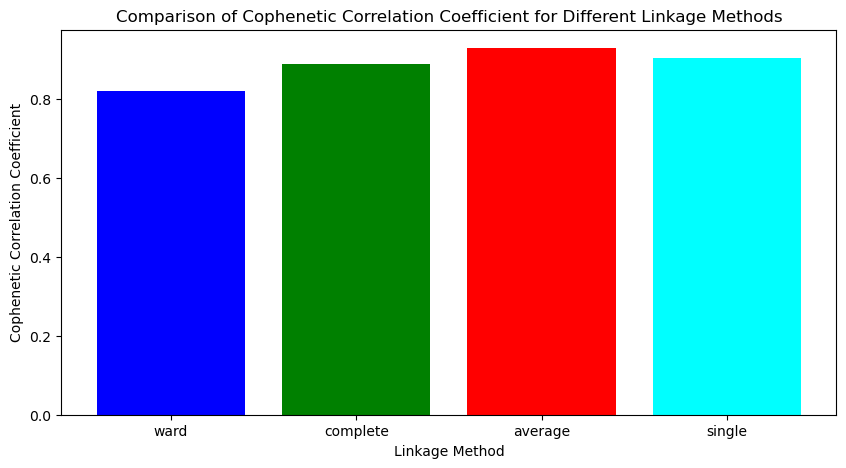

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')  # Pastikan Anda mengganti dengan path file yang benar
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]  # Pilih kolom yang relevan

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Definisikan metode linkage yang akan diuji
linkage_methods = ['ward', 'complete', 'average', 'single']
cophenetic_corrs = {}

# Hitung dan bandingkan cophenetic correlation coefficient untuk setiap metode linkage
for method in linkage_methods:
    # Buat linkage matrix
    Z = linkage(data_scaled, method=method)
    
    # Hitung cophenetic correlation coefficient
    c, coph_dists = cophenet(Z, pdist(data_scaled))
    cophenetic_corrs[method] = c

# Tampilkan hasil
for method, c in cophenetic_corrs.items():
    print(f'Cophenetic Correlation for {method} linkage: {c:.4f}')

# Visualisasi hasil
plt.figure(figsize=(10, 5))
plt.bar(cophenetic_corrs.keys(), cophenetic_corrs.values(), color=['blue', 'green', 'red', 'cyan'])
plt.xlabel('Linkage Method')
plt.ylabel('Cophenetic Correlation Coefficient')
plt.title('Comparison of Cophenetic Correlation Coefficient for Different Linkage Methods')
plt.show()


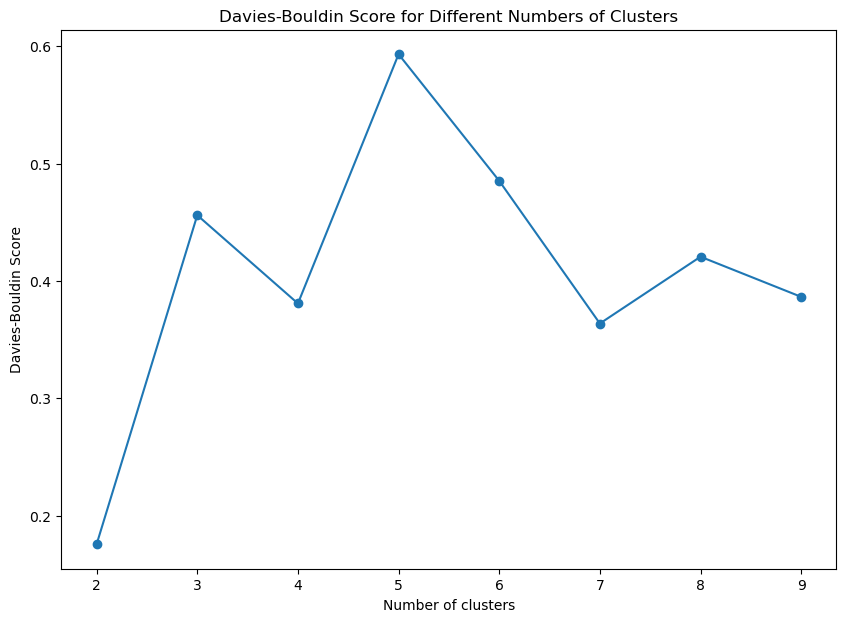

Optimal number of clusters: 2


In [11]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Tentukan rentang kluster yang ingin diuji
range_n_clusters = list(range(2, 10))

# Variabel untuk menyimpan skor Davies-Bouldin
davies_bouldin_scores = []

for n_clusters in range_n_clusters:
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    cluster_labels = agglomerative.fit_predict(data_scaled)
    
    # Davies-Bouldin score
    davies_bouldin = davies_bouldin_score(data_scaled, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin)

# Plot Davies-Bouldin scores
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Cetak jumlah kluster dengan skor Davies-Bouldin terendah
optimal_clusters = range_n_clusters[np.argmin(davies_bouldin_scores)]
print(f'Optimal number of clusters: {optimal_clusters}')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24652\412469245.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


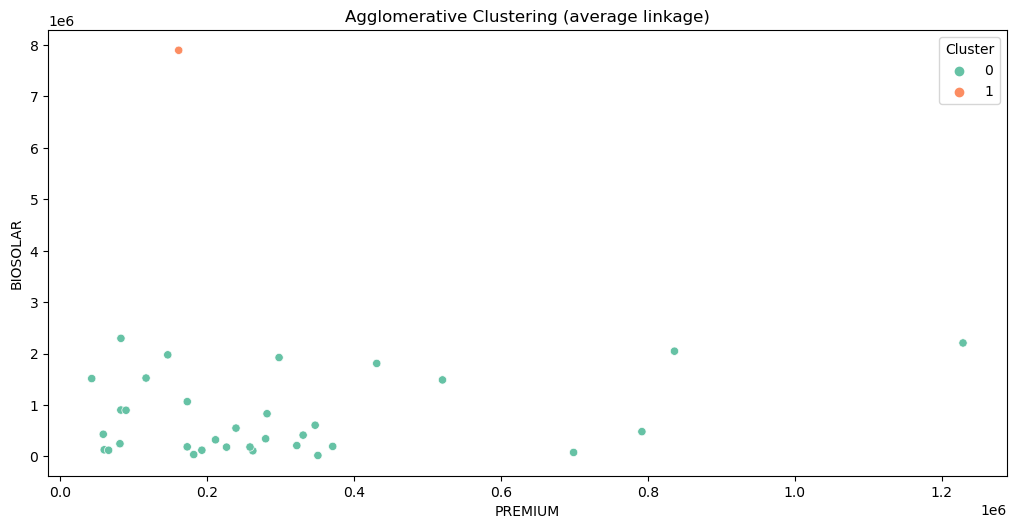

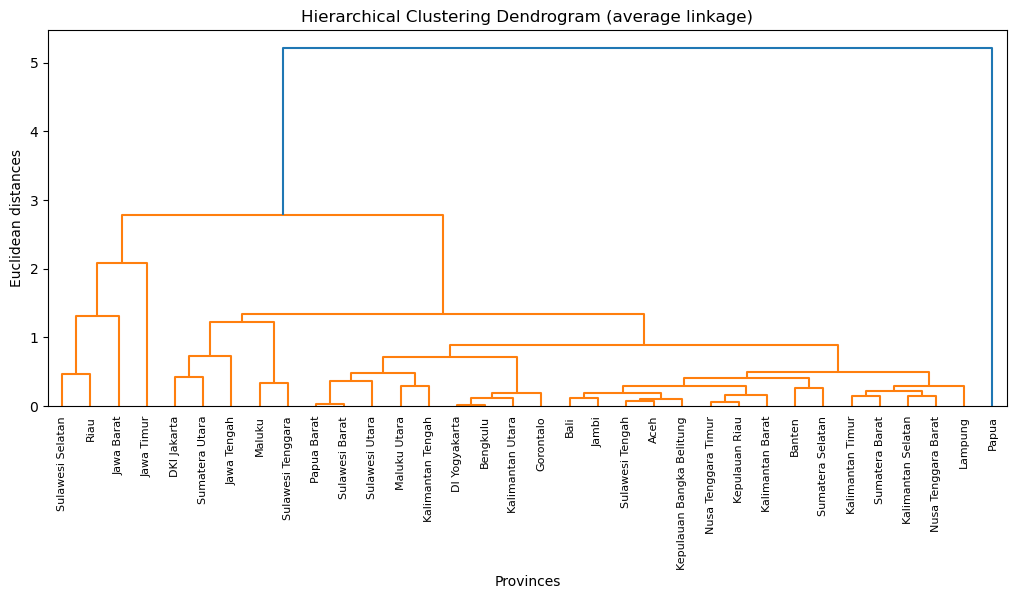

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Definisikan metode linkage yang akan diuji
linkage_methods = ['average']

plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=2, linkage=method)
    cluster_labels = agglomerative.fit_predict(data_scaled)
    
    # Tambahkan label klaster ke DataFrame asli
    df_selected['Cluster'] = cluster_labels
    
    # Visualisasi hasil klastering
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df_selected, x='PREMIUM', y='BIOSOLAR', hue='Cluster', palette='Set2')
    plt.title(f'Agglomerative Clustering ({method} linkage)')
    
plt.tight_layout()
plt.show()

# Visualisasi dendrogram untuk setiap metode linkage
plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    linked = linkage(data_scaled, method=method)
    
    plt.subplot(2, 2, i + 1)
    dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xticks(rotation=90)
    plt.xlabel('Provinces')
    plt.ylabel('Euclidean distances')

plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24652\1685054363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


Karakteristik klaster untuk linkage average:
               PREMIUM      BIOSOLAR
Cluster                             
0        298136.393939  7.713047e+05
1        161499.000000  7.896164e+06




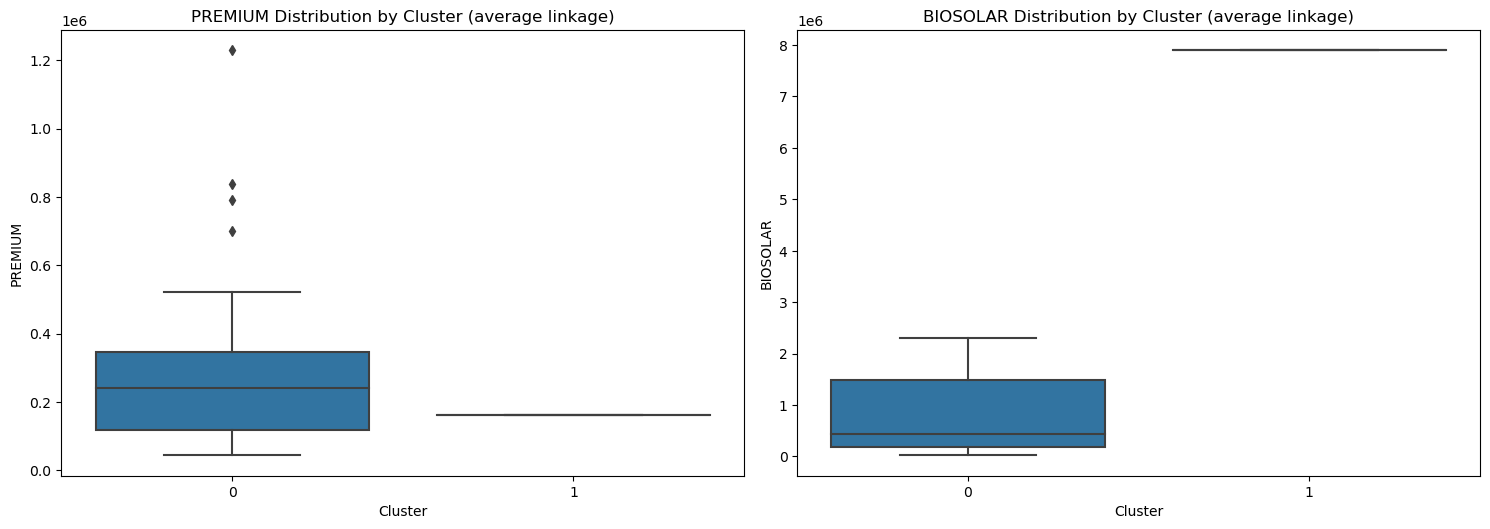

In [13]:
# Analisis karakteristik klaster
for method in linkage_methods:
    agglomerative = AgglomerativeClustering(n_clusters=2, linkage=method)
    cluster_labels = agglomerative.fit_predict(data_scaled)
    df_selected['Cluster'] = cluster_labels
    
    print(f'Karakteristik klaster untuk linkage {method}:')
    print(df_selected.groupby('Cluster').mean())  # Tampilkan rata-rata setiap fitur untuk setiap klaster
    print('\n')
    
    # Visualisasi distribusi fitur berdasarkan klaster
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df_selected.columns[:-1]):  # Exclude the 'Cluster' column
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x='Cluster', y=column, data=df_selected)
        plt.title(f'{column} Distribution by Cluster ({method} linkage)')
    
    plt.tight_layout()
    plt.show()

In [14]:
df_selected

,PREMIUM,BIOSOLAR,Cluster
Provinsi,,,
Aceh,181973,36798,0
Sumatera Utara,431005,1808209,0
Sumatera Barat,330848,414606,0
Riau,698926,77686,0
Jambi,211627,323671,0
Sumatera Selatan,239477,550981,0
Bengkulu,60149,129058,0
Lampung,347218,607444,0
Kepulauan Bangka Belitung,173105,186764,0


## RAC++

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24652\212359916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


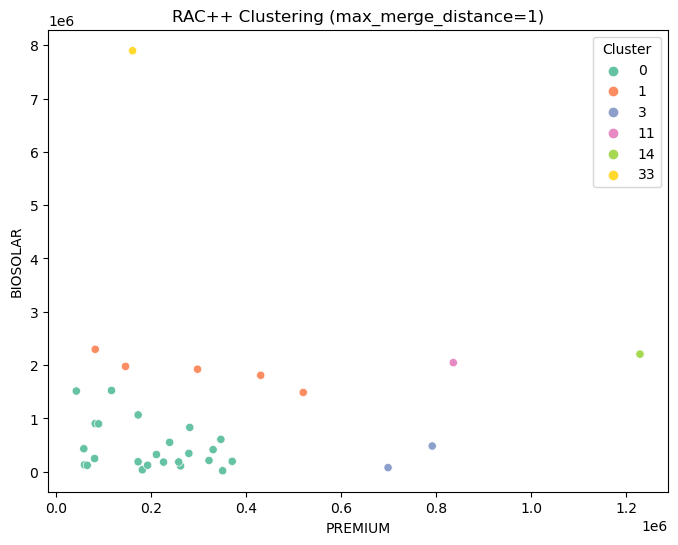

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24652\212359916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


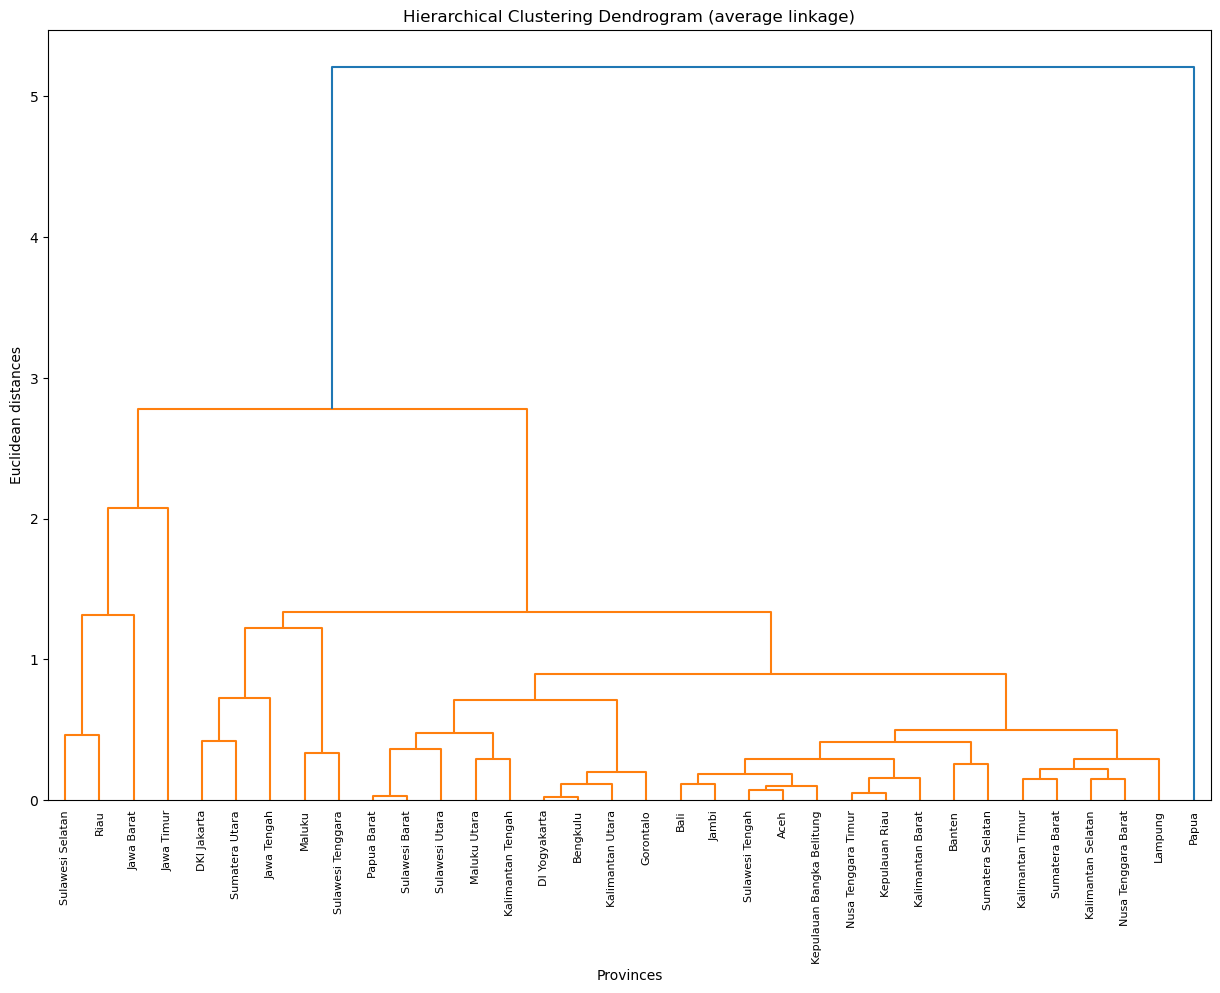

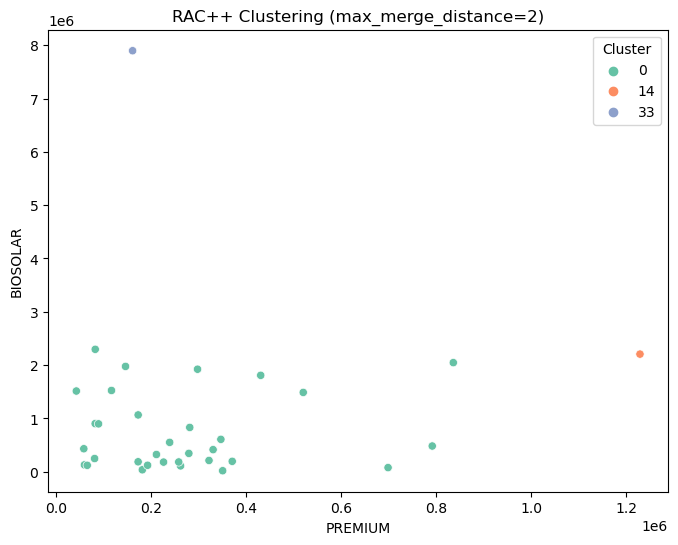

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24652\212359916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


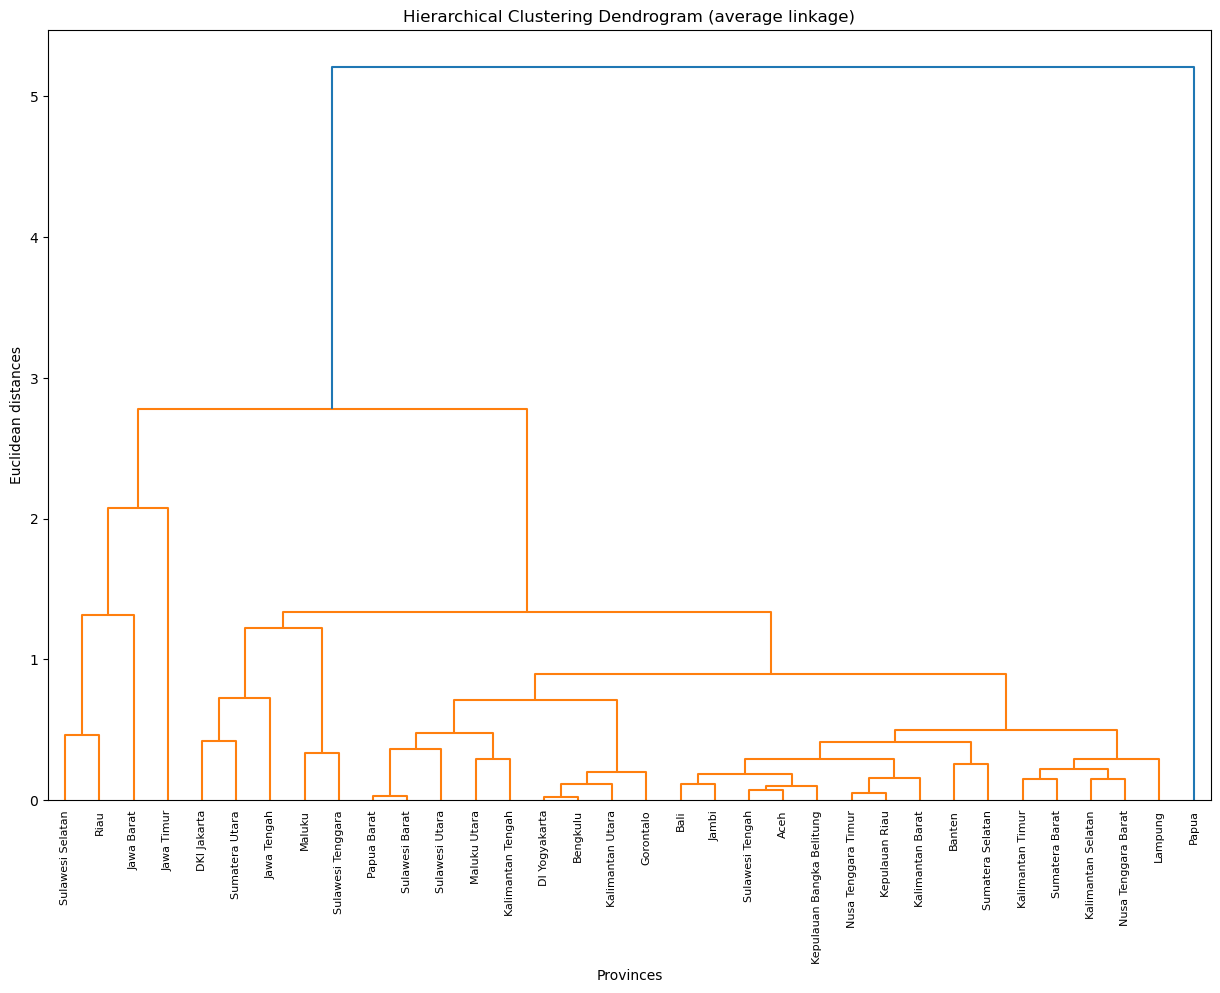

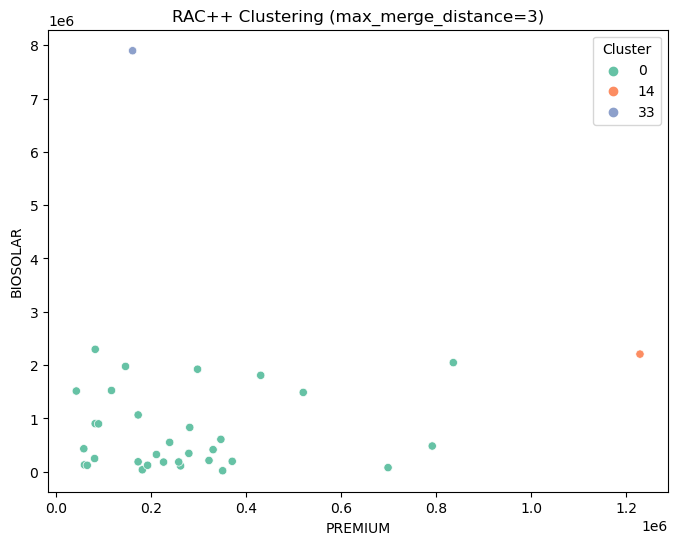

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24652\212359916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


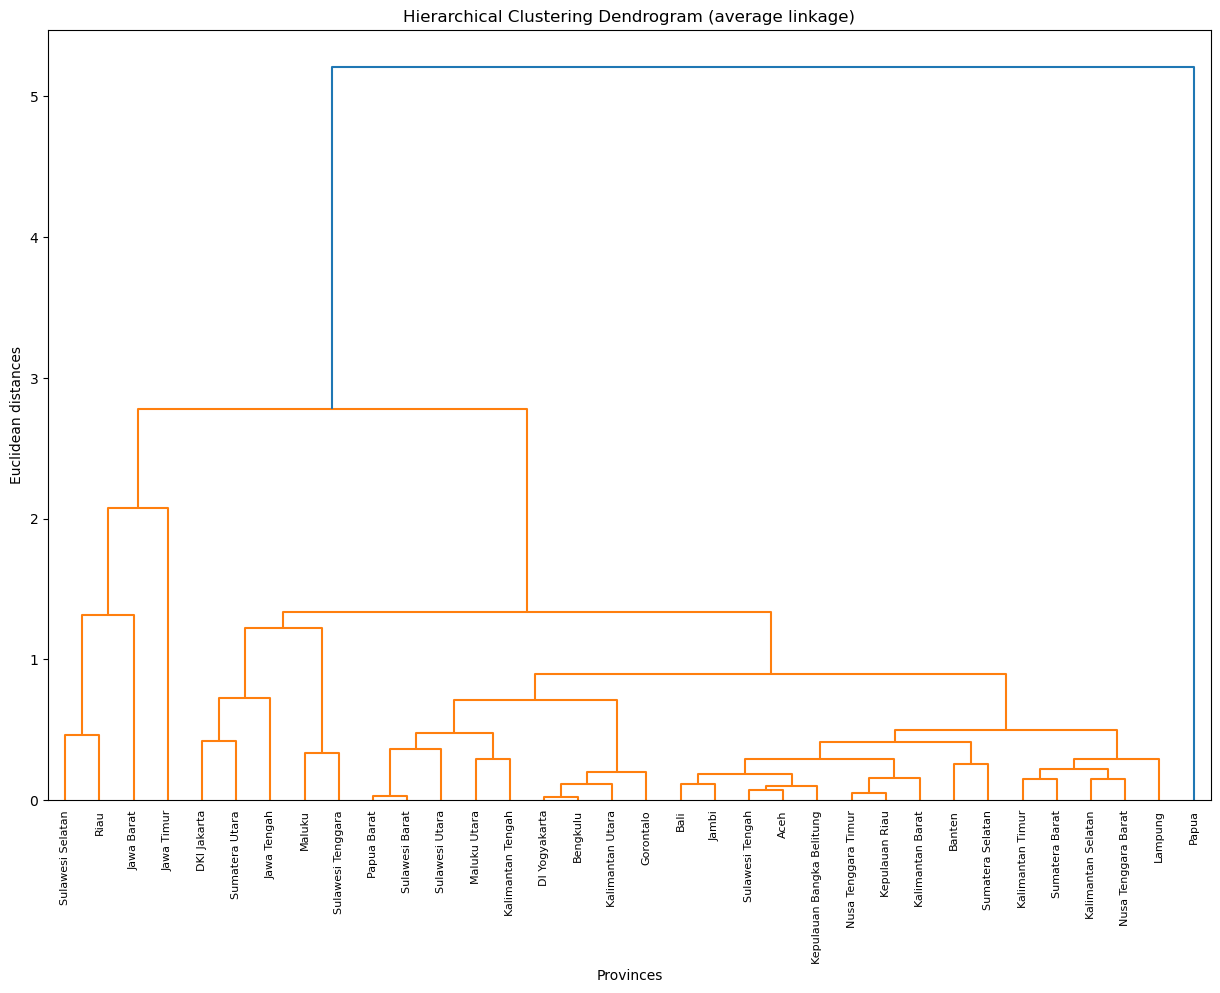

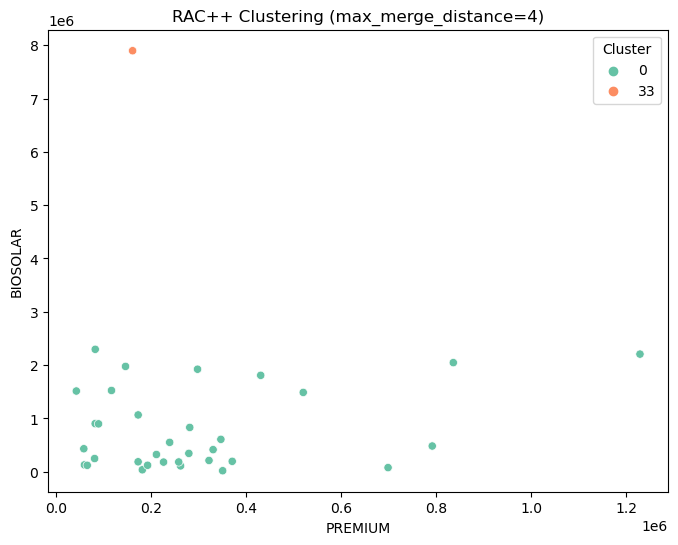

max_merge_distance=1: Davies-Bouldin Index=0.4852441162214339
max_merge_distance=2: Davies-Bouldin Index=0.18289473223576466
max_merge_distance=3: Davies-Bouldin Index=0.18289473223576466
max_merge_distance=4: Davies-Bouldin Index=0.17552709374866765


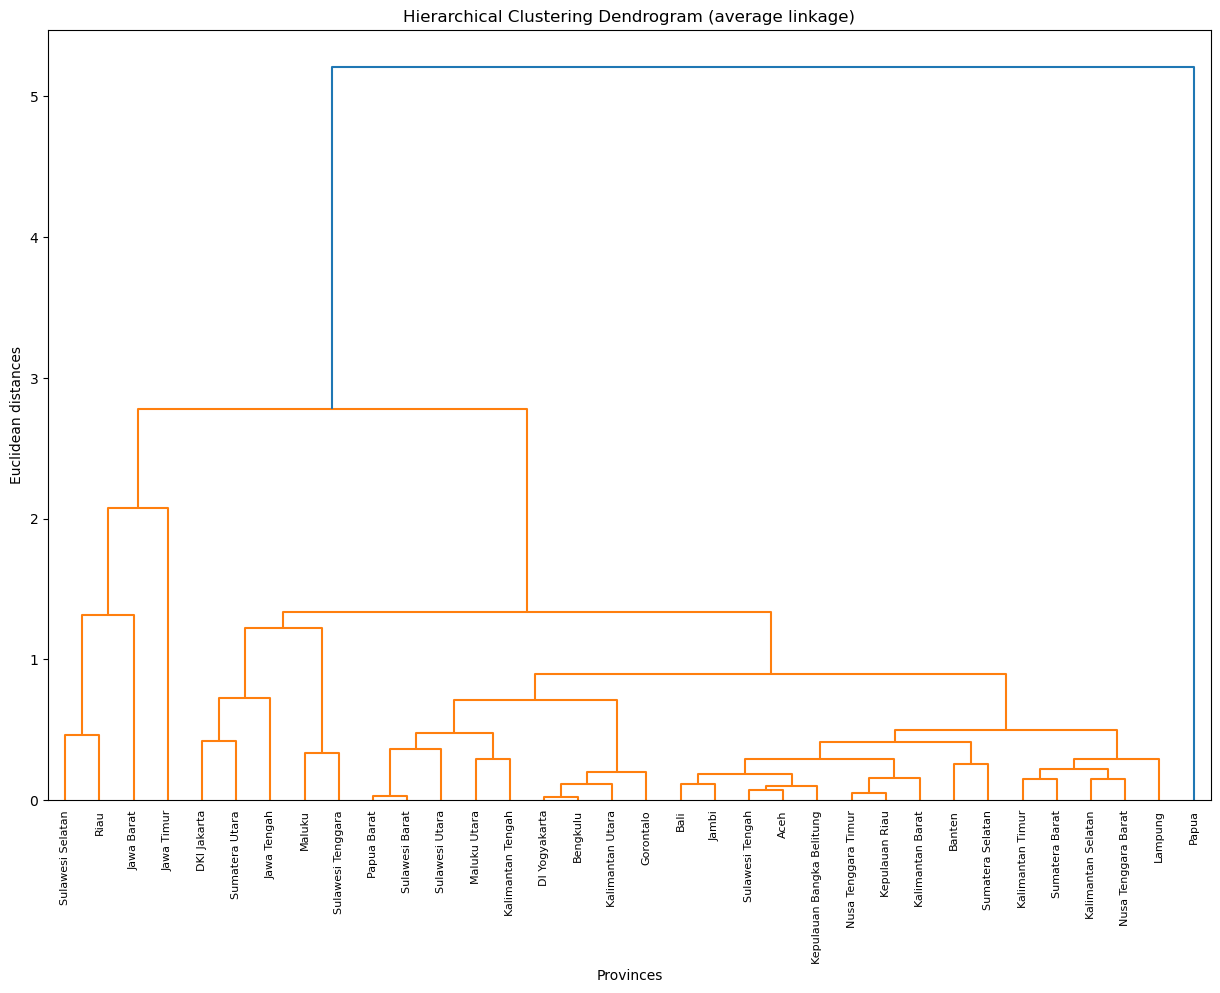

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import racplusplus
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import davies_bouldin_score

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Definisikan metode linkage yang akan diuji
linkage_methods = ['average']

# Hitung KNN dan buat matriks simetris
knn = kneighbors_graph(data_scaled, 10, mode='connectivity', include_self=False)
symmetric_knn = knn.maximum(knn.T)

# Coba beberapa nilai max_merge_distance dan evaluasi
max_merge_distances = [1, 2, 3,4]
results = {}

for max_merge_distance in max_merge_distances:
    # RAC++ clustering
    rac_labels = racplusplus.rac(data_scaled, max_merge_distance, symmetric_knn.toarray(), 1000, 4, "euclidean")
    df_selected['Cluster'] = rac_labels
    
    # Evaluasi clustering dengan Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(data_scaled, rac_labels)
    results[max_merge_distance] = davies_bouldin
    
    # Visualisasi hasil klastering
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_selected, x='PREMIUM', y='BIOSOLAR', hue='Cluster', palette='Set2')
    plt.title(f'RAC++ Clustering (max_merge_distance={max_merge_distance})')
    plt.show()

    # Visualisasi dendrogram
    linked = linkage(data_scaled, method='average')
    plt.figure(figsize=(15, 10))
    dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xticks(rotation=90)
    plt.xlabel('Provinces')
    plt.ylabel('Euclidean distances')

# Print hasil evaluasi
for max_merge_distance, davies_bouldin in results.items():
    print(f"max_merge_distance={max_merge_distance}: Davies-Bouldin Index={davies_bouldin}")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24652\3033669283.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


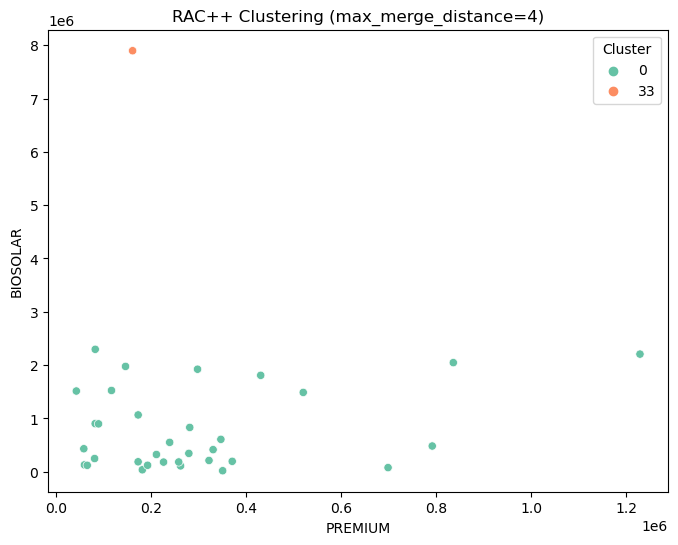

max_merge_distance=4: Davies-Bouldin Index=0.17552709374866765


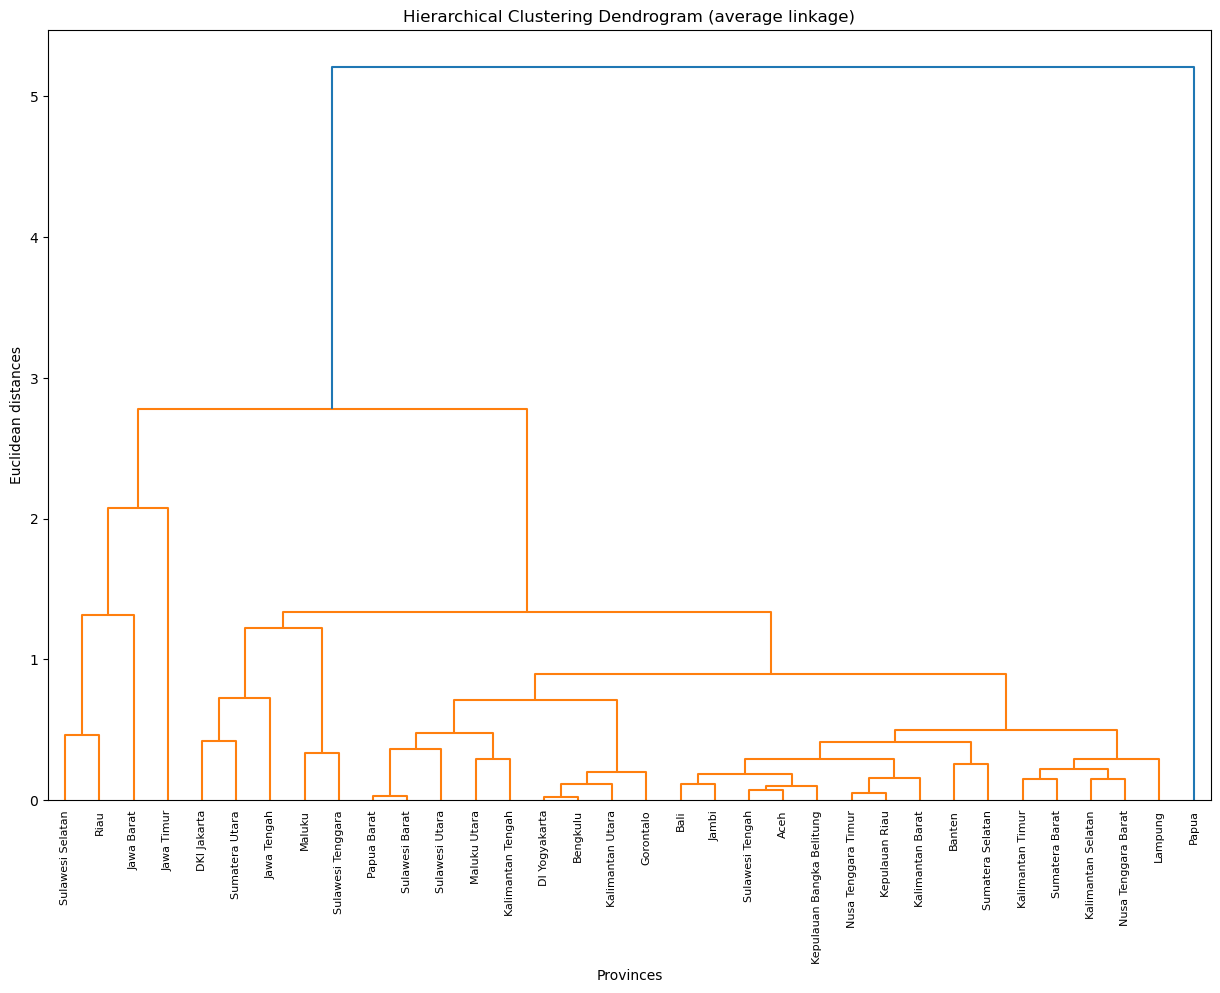

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import racplusplus
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import davies_bouldin_score

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Definisikan metode linkage yang akan diuji
linkage_methods = ['average']

# Hitung KNN dan buat matriks simetris
knn = kneighbors_graph(data_scaled, 10, mode='connectivity', include_self=False)
symmetric_knn = knn.maximum(knn.T)

# Coba beberapa nilai max_merge_distance dan evaluasi
max_merge_distances = [4]
results = {}

for max_merge_distance in max_merge_distances:
    # RAC++ clustering
    rac_labels = racplusplus.rac(data_scaled, max_merge_distance, symmetric_knn.toarray(), 1000, 4, "euclidean")
    df_selected['Cluster'] = rac_labels
    
    # Evaluasi clustering dengan Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(data_scaled, rac_labels)
    results[max_merge_distance] = davies_bouldin
    
    # Visualisasi hasil klastering
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_selected, x='PREMIUM', y='BIOSOLAR', hue='Cluster', palette='Set2')
    plt.title(f'RAC++ Clustering (max_merge_distance={max_merge_distance})')
    plt.show()

    # Visualisasi dendrogram
    linked = linkage(data_scaled, method='average')
    plt.figure(figsize=(15, 10))
    dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xticks(rotation=90)
    plt.xlabel('Provinces')
    plt.ylabel('Euclidean distances')

# Print hasil evaluasi
for max_merge_distance, davies_bouldin in results.items():
    print(f"max_merge_distance={max_merge_distance}: Davies-Bouldin Index={davies_bouldin}")


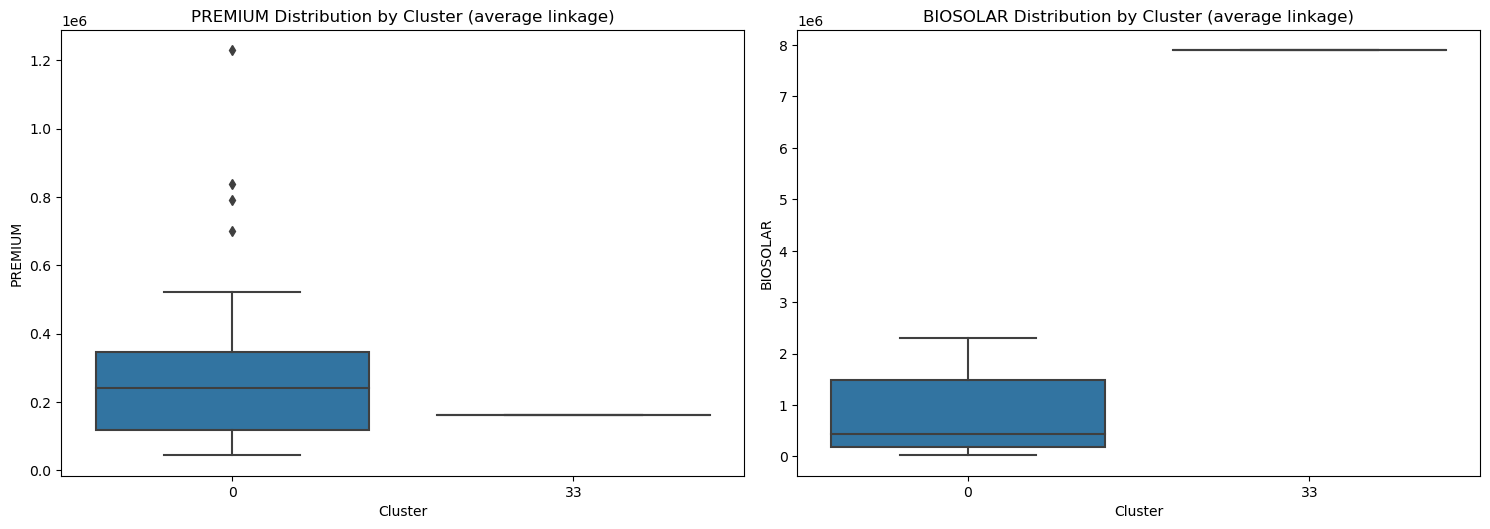

In [17]:
# Analisis karakteristik klaster
for method in linkage_methods:
    # Visualisasi distribusi fitur berdasarkan klaster
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df_selected.columns[:-1]):  # Exclude the 'Cluster' column
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x='Cluster', y=column, data=df_selected)
        plt.title(f'{column} Distribution by Cluster ({method} linkage)')
    
    plt.tight_layout()
    plt.show()